How do you create a complex model using scikit-learn? An easy solution is to start with a simple model like linear regression and go from there.

![image](images/linearregression.png)

In this video, I'll show you can create a linear regression model using Scikit-Learn so that more complex models will be easier to create



The basic rule to know in Linear regresion is that we need to calculate 2 things:

             1) Interception ( where the line start)
             2) Scope ( what its the inclination of the line, how fast is it growing up) 

## Import Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load the Dataset
The dataset that is loaded below is a dataset which is designed to show that Scikit-Learn requires data to be free of missing values. If you don't remove or impute your missing values, you will get an error. The goal of this dataset is to use the feature column x to predict the target column **y.** 

In [2]:
df = pd.read_csv("data/linear.csv")
df.head()

,x,y
0,0.000000,-51.000000
1,25.000000,-12.000000
2,117.583220,134.907414
3,108.922466,134.085179
4,69.887445,NaN


##  Remove Missing or Impute Values
If you want to build models with your data, null values are (almost) never allowed. It is important to always see how many samples have missing values and for which columns.

In [3]:
# Look at the shape of the dataframe
df.shape

(102, 2)

In [4]:
# There are missing values in the y column which is what we will predict 
df.isnull().sum()

x    0
y    8
dtype: int64

You can either remove rows where there is a missing value or you can fill in missing values. The option used in this notebook is to remove rows with missing values. 

In [5]:
# Remove entire rows from dataframe if they contain any nans in them or 'all'
# this may not be the best strategy for our dataset --> particulary if our dataset its small
df = df.dropna(how = 'any')

In [6]:
# There are no more missing values
df.isnull().sum()

x    0
y    0
dtype: int64

In [7]:
df.shape

(94, 2)

You could have filled in missing values using the `fillna` method on a pandas series if you want

## Arrange Data into Features Matrix and Target Vector

In [8]:
# Convert x column to numpy array
X = df.loc[:, ['x']].values

In [9]:
# Features Matrix needs to be at 2 dimensional
X.shape

(94, 1)

In [10]:
y = df.loc[:, 'y'].values

In [11]:
y.shape

(94,)

## Linear Regression

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [12]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.linear_model import LinearRegression

<b>Step 2:</b> Make an instance of the Model

This is a place where you can tune the hyperparameters of a model. In the case of linear regression, you can set `fit_intercept` to True or False depending on your needs. This is an important concept as more complex models have a lot more you can tune. 

![images](images/regInterceptTrueFalse.png)

In [13]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

In [14]:
# If you want to see what you can tune for a model, you can use the help function
#help(LinearRegression)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x and y

In [15]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<b>Step 4:</b> Predict the values of new data. Uses the information the model learned during the model training process

Predict for One Observation

In [16]:
# Input needs to be two dimensional (reshape makes input two dimensional )
reg.predict(X[0].reshape(-1,1))

array([-50.99119328])

Predict for Multiple Observations at Once

In [17]:
reg.predict(X[0:10])

array([-50.99119328, -11.39905237, 135.223663  , 121.50775193,
       102.37289634,  31.0056196 ,   4.46431068,  74.84474012,
        20.82088826,  72.16749711])

## Measuring Model Performance

Unlike classification models where a common metric is accuracy, regression models use other metrics like R^2, the coefficient of determination to quantify your model's performance. The best possible score is 1.0. A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [18]:
score = reg.score(X, y)
print(score)

0.979881836115762


## What is the equation of the line for the regression?

After you fit an instance of a model in scikit-learn, you can use additional attributes. 

In [19]:
reg.coef_

array([1.58368564])

In [20]:
reg.intercept_

-50.99119328333401

In [21]:
m = reg.coef_[0]

b = reg.intercept_

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

formula: y = 1.58x + -50.99


## Plotting the Best Fit Linear Regression Line in Red

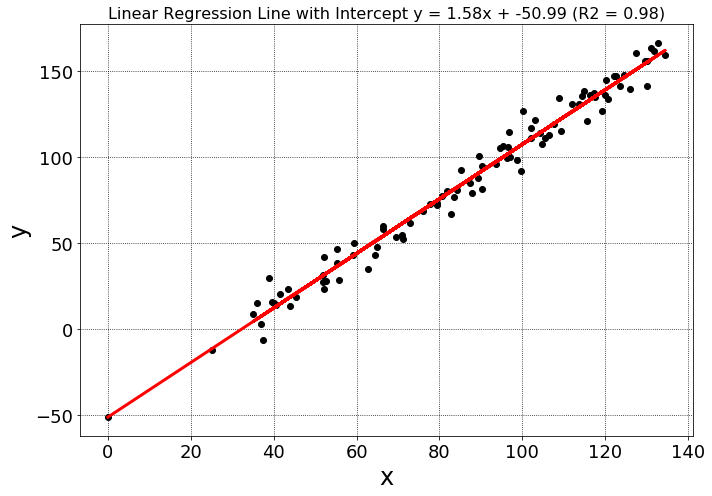

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='black');
ax.plot(X, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('x', fontsize = 24)
ax.set_ylabel('y', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

### Plotting Models With or Without Intercept
In this section, you will see how changing a hyperparameter value can have a drastic impact on the R2 

In [23]:
# Model with Intercept (like earlier in notebook)
reg_inter = LinearRegression(fit_intercept=True)
reg_inter.fit(X,y)
predictions_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X, y)

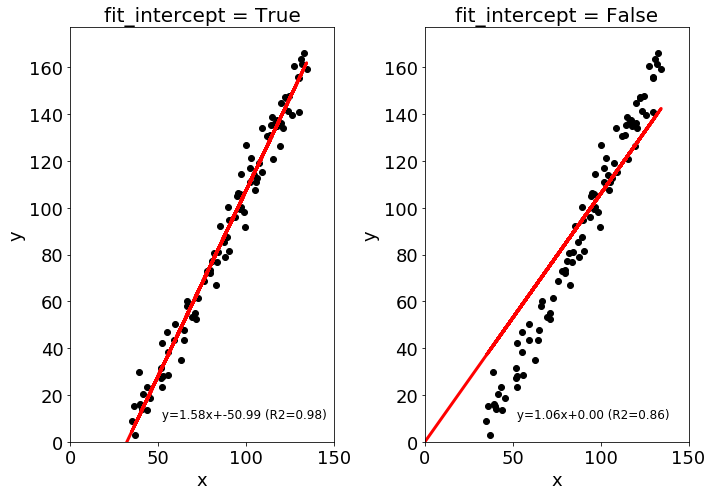

In [24]:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7));

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]): 
    model.fit(X,y)
    predictions = model.predict(X)
    score = model.score(X, y)
    m = model.coef_[0]
    b = model.intercept_
    
    ax[index].scatter(X, y, color='black');
    ax[index].plot(X, model.predict(X), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 18)
    ax[index].set_xlabel('x', fontsize = 18)
    ax[index].set_ylabel('y', fontsize = 18)
    ax[index].set_xlim(left = 0, right = 150)
    ax[index].set_ylim(bottom = 0)
    
    ax[index].text(50, 10, " y={:.2f}x+{:.2f} (R2={:.2f})".format(m, b, score), fontsize = 12)

ax[0].set_title('fit_intercept = True', fontsize = 20)   
ax[1].set_title('fit_intercept = False',  fontsize = 20)    
fig.tight_layout()

So that's it, I encourage you to create a linear regression model using scikit-learn so you can have a better understanding how scikit-learn works. 

In [ ]:
Homeworks --> in that example whats pretty easy cause you just hast 2 columns so we just had 1 dependent variable, how would you use the potential of the Regresion model in a Dataframe
    - Which column its the one